<a href="https://colab.research.google.com/github/lukmanbayhaqi/employee-attrition-eda/blob/master/tb1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tugas Besar 1 Visualisasi Data EDA :Univariate - Bivariate -Multivariate Analysis

# ## Dataset :

The data contains demographic details, work-related metrics and attrition flag.

* **EmployeeNumber** - Employee Identifier 6
* **Attrition** - Did the employee attrite? 1
* **Age** - Age of the employee 1
* **BusinessTravel** - Travel commitments for the job 1
* **DailyRate** - Data description not available** 3
* **Department** - Employee Department 5
* **DistanceFromHome** - Distance from work to home (in km) 1
* **Education** - 1-Below College, 2-College, 3-Bachelor, 4-Master,5-Doctor 
* **EducationField** - Field of Education 3
* **EnvironmentSatisfaction** - 1-Low, 2-Medium, 3-High, 4-Very High 1
* **Gender** - Employee's gender 1
* **HourlyRate** - Data description not available** 2
* **JobInvolvement** - 1-Low, 2-Medium, 3-High, 4-Very High 1
* **JobLevel** - Level of job (1 to 5) 2
* **JobRole** - Job Roles 1
* **JobSatisfaction** - 1-Low, 2-Medium, 3-High, 4-Very High 1
* **MaritalStatus** - Marital Status 1
* **MonthlyIncome** - Monthly Salary 1
* **MonthlyRate** - Data description not available** 3
* **NumCompaniesWorked** - Number of companies worked at 2
* **Over18** - Over 18 years of age? 2
* **OverTime** - Overtime? 1
* **PercentSalaryHike** - The percentage increase in salary last year 1
* **PerformanceRating** - 1-Low, 2-Good, 3-Excellent, 4-Outstanding 1
* **RelationshipSatisfaction** - 1-Low, 2-Medium, 3-High, 4-Very High 1
* **StandardHours** - Standard Hours 2
* **StockOptionLevel** - Stock Option Level 2
* **TotalWorkingYears** - Total years worked 1
* **TrainingTimesLastYear** - Number of training attended last year 2
* **WorkLifeBalance** - 1-Low, 2-Good, 3-Excellent, 4-Outstanding 1
* **YearsAtCompany** - Years at Company 1
* **YearsInCurrentRole** - Years in the current role 1
* **YearsSinceLastPromotion** - Years since the last promotion 1
* **YearsWithCurrManager** - Years with the current manager 1

# EDA

(1) Drop semua kolom yang tidak diperlukan pada data employee.csv. Lakukan EDA univariat untuk setiap kolom numerik pada employee.csv yang mencakup:<p>
    a. histogram dan boxplot untuk tiap kolom<p>
    b. metrik statistik dasar untuk tiap kolom: mean, std, min, q1, q2, q3, iqr, max<p>
    c. identifikasi nilai upper whisker dan lower whisker dari boxplot tiap kolom<p>
    d. apabila terdapat outlier (<q1-1.5*iqr | >q3+1.5*iqr): hitung count, proportion, dan list dari outlier tiap kolom<p>
    e. identifikasi hal yang menurut anda menarik dari hasil EDA yang Anda dapatkan

(2) Lakukan EDA univariat untuk setiap kolom kategorikal pada employee.csv yang mencakup:

a. countplot untuk tiap kolom

b. daftar kategori unik dan frekuensinya untuk tiap kolom

c. identifikasi hal yang menurut anda menarik dari hasil EDA yang Anda dapatkan

(3) Lakukan EDA multivariat untuk pasangan kolom numerik dan kolom 'Attrition' pada employee.csv yang mencakup:

a. boxplot (atau variasinya) antara semua kolom numerik (axis y) dan kolom 'attrition' (axis x)

b. identifikasi hal yang menurut anda menarik dari hasil EDA yang Anda dapatkan

(4) Lakukan EDA multivariat untuk pasangan kolom kategorikal dan kolom 'Attrition' pada employee.csv yang mencakup:

a. countplot untuk tiap kolom kategorikal dengan kolom 'Attrition' sebagai hue

b. stacked barplot yang menunjukkan proporsi value kolom 'Attrition' untuk masing-masing kategori pada semua kolom kategorikal (1 kolom kategorikal 1 plot, 1 plot berisi stacked bar sejumlah banyaknya kategori unik pada kolom kategori tersebut)

c. identifikasi hal yang menurut anda menarik dari hasil EDA yang Anda dapatkan

In [ ]:
pip install empiricaldist

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for empiricaldist: filename=empiricaldist-0.6.8-py3-none-any.whl size=12122 sha256=42b430a1a267e67ffc37d788ec59105d614fc568e85596cc481144f613de5f2f
  Stored in directory: /root/.cache/pip/wheels/c2/2f/73/700abc644ee5aba92a8b40552794103c445cd47fcdfe7828f7
Successfully built empiricaldist


In [ ]:
pip install tables

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install prettytable

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from empiricaldist import Pmf, Cdf
from scipy.stats import norm
from prettytable import PrettyTable

In [ ]:
emp = pd.read_csv('employee.csv', index_col=0)
emp.head()

,EmployeeNumber,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,Yes,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,...,1,80,0,8,0,1,6,4,0,5
1,2,No,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,...,4,80,1,10,3,3,10,7,1,7
2,3,Yes,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,...,2,80,0,7,3,3,0,0,0,0
3,4,No,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,...,3,80,0,8,3,3,8,7,3,0
4,5,No,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
# drop unnecessary column

emp = emp.drop(columns=['EmployeeNumber', 'DailyRate', 'Department', 'EducationField', 'HourlyRate', 'JobLevel', 'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'StandardHours', 'StockOptionLevel', 'TrainingTimesLastYear'])

In [ ]:
emp.dtypes

Attrition                   object
Age                          int64
BusinessTravel              object
DistanceFromHome             int64
Education                    int64
EnvironmentSatisfaction      int64
Gender                      object
JobInvolvement               int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
TotalWorkingYears            int64
WorkLifeBalance              int64
YearsAtCompany               int64
YearsInCurrentRole           int64
YearsSinceLastPromotion      int64
YearsWithCurrManager         int64
dtype: object

In [ ]:
# 1.a.

fig,ax = plt.subplots(5,3, figsize=(20,20))

plt.suptitle("Histogram", fontsize=20)

sns.barplot(x = 'Attrition', y = 'Age', data = emp, hue = 'Attrition', ax = ax[0,0])
sns.barplot(x = 'Attrition', y = 'DistanceFromHome', data = emp, hue = 'Attrition', ax = ax[0,1])
sns.barplot(x = 'Attrition', y = 'EnvironmentSatisfaction', data = emp, hue = 'Attrition', ax = ax[0,2])
sns.barplot(x = 'Attrition', y = 'JobInvolvement', data = emp, hue = 'Attrition', ax = ax[1,0])
sns.barplot(x = 'Attrition', y = 'JobSatisfaction', data = emp, hue = 'Attrition', ax = ax[1,1])
sns.barplot(x = 'Attrition', y = 'MonthlyIncome', data = emp, hue = 'Attrition', ax = ax[1,2])
sns.barplot(x = 'Attrition', y = 'PercentSalaryHike', data = emp, hue = 'Attrition', ax = ax[2,0])
sns.barplot(x = 'Attrition', y = 'PerformanceRating', data = emp, hue = 'Attrition', ax = ax[2,1])
sns.barplot(x = 'Attrition', y = 'RelationshipSatisfaction', data = emp, hue = 'Attrition', ax = ax[2,2])
sns.barplot(x = 'Attrition', y = 'TotalWorkingYears', data = emp, hue = 'Attrition', ax = ax[3,0])
sns.barplot(x = 'Attrition', y = 'WorkLifeBalance', data = emp, hue = 'Attrition', ax = ax[3,1])
sns.barplot(x = 'Attrition', y = 'YearsAtCompany', data = emp, hue = 'Attrition', ax = ax[3,2])
sns.barplot(x = 'Attrition', y = 'YearsInCurrentRole', data = emp, hue = 'Attrition', ax = ax[4,0])
sns.barplot(x = 'Attrition', y = 'YearsSinceLastPromotion', data = emp, hue = 'Attrition', ax = ax[4,1])
sns.barplot(x = 'Attrition', y = 'YearsWithCurrManager', data = emp, hue = 'Attrition', ax = ax[4,2])

plt.show()

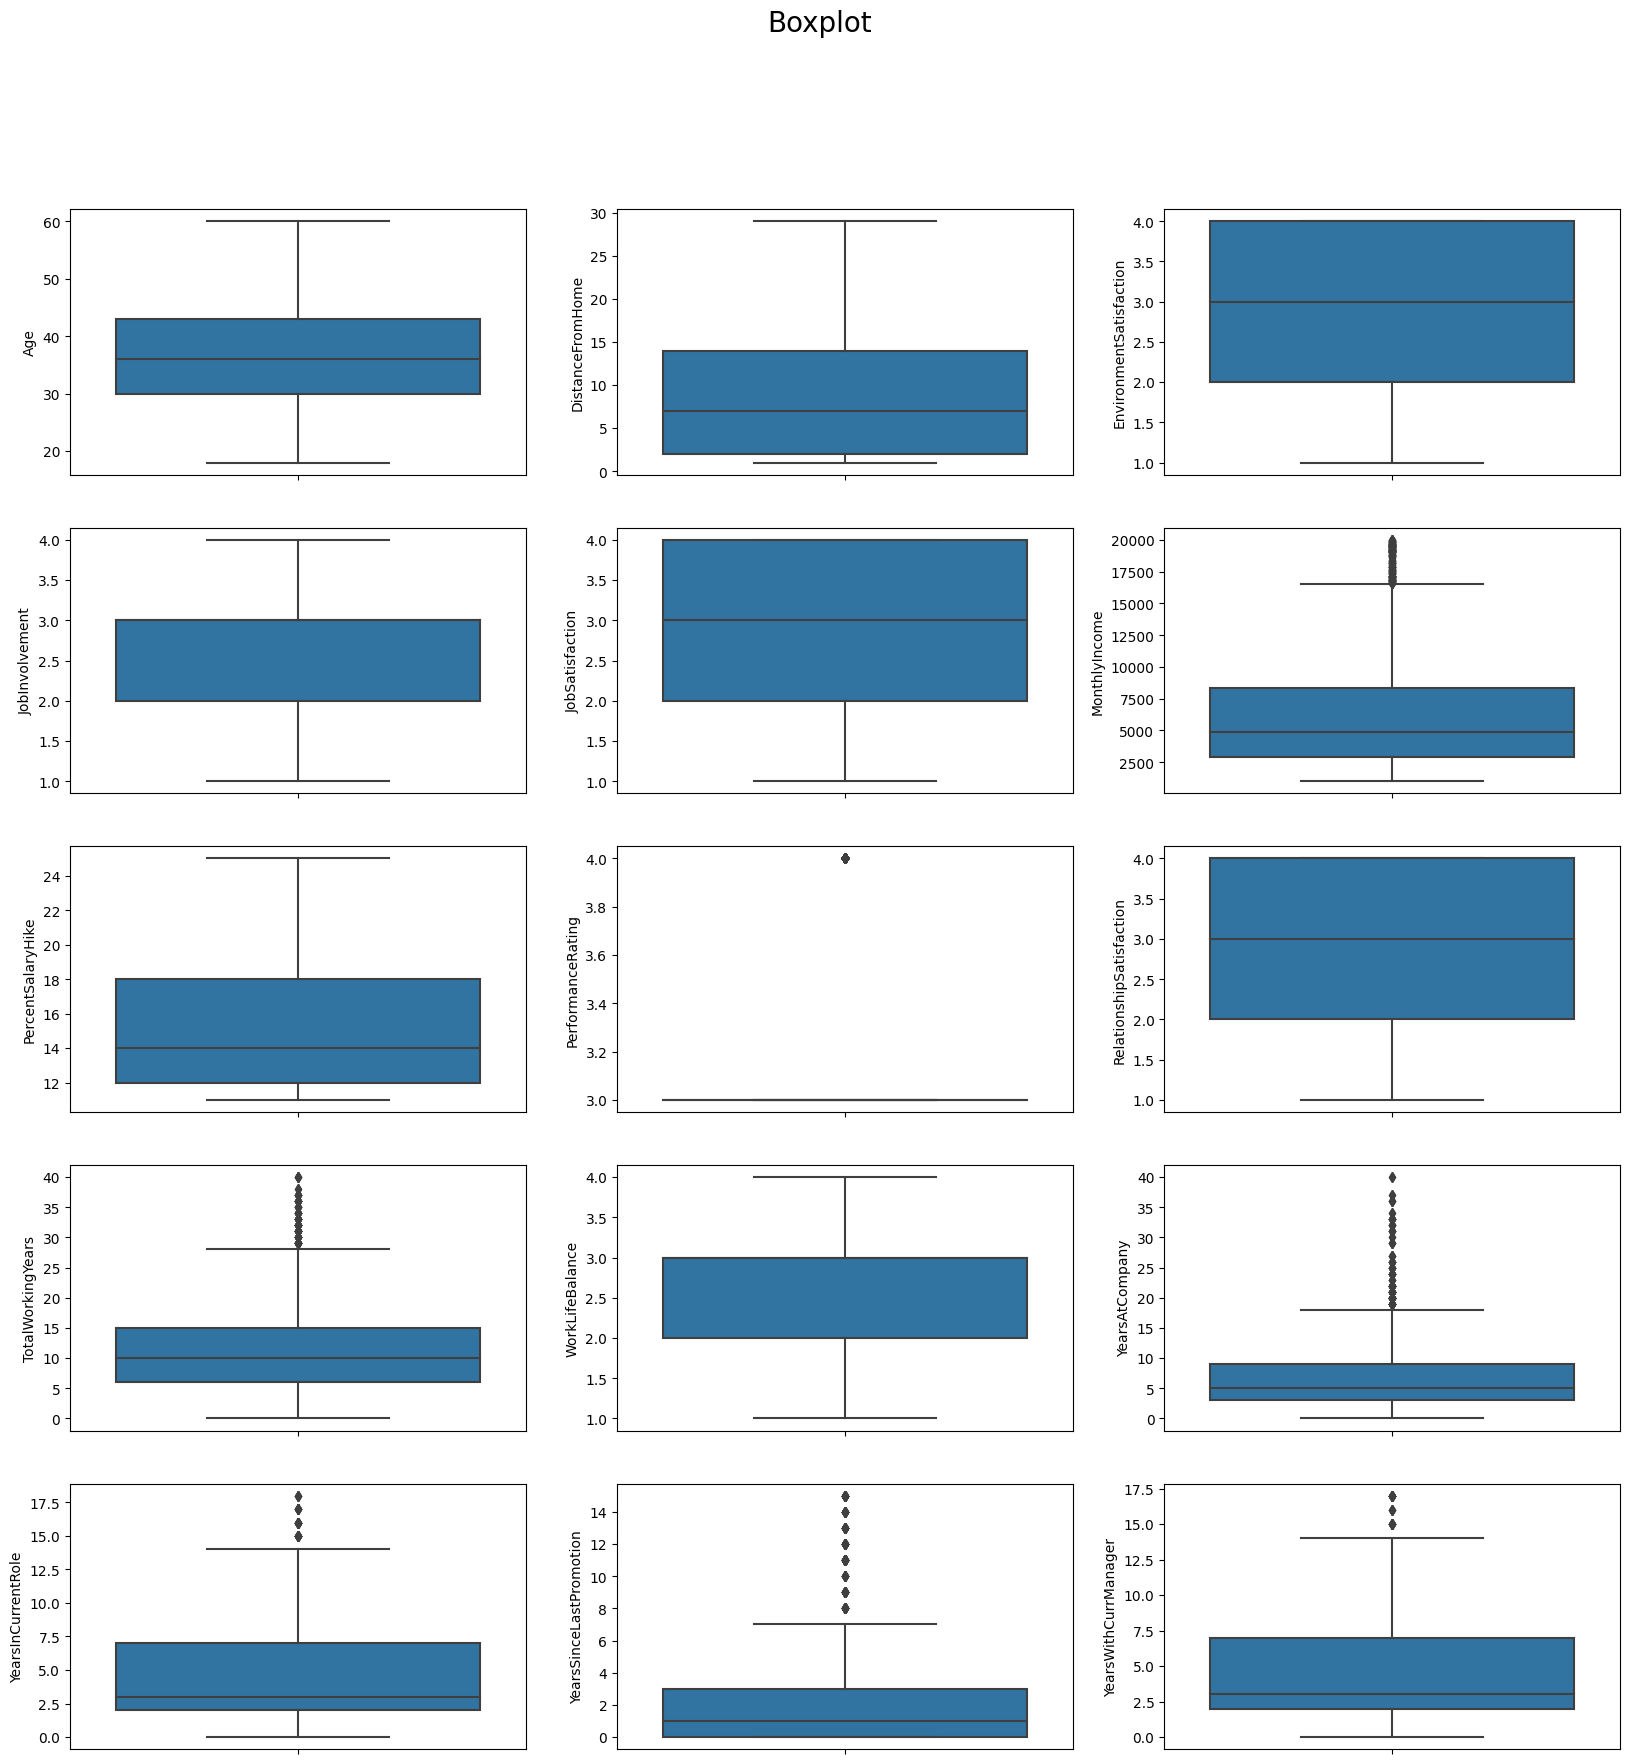

In [ ]:
# 1.a.

fig,ax = plt.subplots(5,3, figsize=(20,20))

plt.suptitle("Boxplot", fontsize=20)

sns.boxplot(y = 'Age', data = emp, ax = ax[0,0])
sns.boxplot(y = 'DistanceFromHome', data = emp, ax = ax[0,1])
sns.boxplot(y = 'EnvironmentSatisfaction', data = emp, ax = ax[0,2])
sns.boxplot(y = 'JobInvolvement', data = emp, ax = ax[1,0])
sns.boxplot(y = 'JobSatisfaction', data = emp, ax = ax[1,1])
sns.boxplot(y = 'MonthlyIncome', data = emp, ax = ax[1,2])
sns.boxplot(y = 'PercentSalaryHike', data = emp, ax = ax[2,0])
sns.boxplot(y = 'PerformanceRating', data = emp, ax = ax[2,1])
sns.boxplot(y = 'RelationshipSatisfaction', data = emp, ax = ax[2,2])
sns.boxplot(y = 'TotalWorkingYears', data = emp, ax = ax[3,0])
sns.boxplot(y = 'WorkLifeBalance', data = emp, ax = ax[3,1])
sns.boxplot(y = 'YearsAtCompany', data = emp, ax = ax[3,2])
sns.boxplot(y = 'YearsInCurrentRole', data = emp, ax = ax[4,0])
sns.boxplot(y = 'YearsSinceLastPromotion', data = emp, ax = ax[4,1])
sns.boxplot(y = 'YearsWithCurrManager', data = emp, ax = ax[4,2])

plt.show()

In [ ]:
# 1.b.

emp.describe()

,EmployeeNumber,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,...,2940.000000,2940.0,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000
mean,1470.500000,36.923810,802.485714,9.192517,2.912925,2.721769,65.891156,2.729932,2.063946,2.728571,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,848.849221,9.133819,403.440447,8.105485,1.023991,1.092896,20.325969,0.711440,1.106752,1.102658,...,1.081025,0.0,0.851932,7.779458,1.289051,0.706356,6.125483,3.622521,3.221882,3.567529
min,1.000000,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,735.750000,30.000000,465.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,1470.500000,36.000000,802.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,2205.250000,43.000000,1157.000000,14.000000,4.000000,4.000000,84.000000,3.000000,3.000000,4.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,2940.000000,60.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [ ]:
# 1.b.

table = PrettyTable(['Name', 'Iqr'])

table.align = 'l'

for i in (emp.select_dtypes(include=['int64'])):
  if i != 'EmployeeNumber':
    upper_quartile = np.percentile(emp[i], 75)
    lower_quartile = np.percentile(emp[i], 25)
    iqr = upper_quartile - lower_quartile
    table.add_row([i, iqr])

print(table)

+--------------------------+---------+
| Name                     | Iqr     |
+--------------------------+---------+
| Age                      | 13.0    |
| DailyRate                | 692.0   |
| DistanceFromHome         | 12.0    |
| Education                | 2.0     |
| EnvironmentSatisfaction  | 2.0     |
| HourlyRate               | 36.0    |
| JobInvolvement           | 1.0     |
| JobLevel                 | 2.0     |
| JobSatisfaction          | 2.0     |
| MonthlyIncome            | 5469.0  |
| MonthlyRate              | 12417.0 |
| NumCompaniesWorked       | 3.0     |
| PercentSalaryHike        | 6.0     |
| PerformanceRating        | 0.0     |
| RelationshipSatisfaction | 2.0     |
| StandardHours            | 0.0     |
| StockOptionLevel         | 1.0     |
| TotalWorkingYears        | 9.0     |
| TrainingTimesLastYear    | 1.0     |
| WorkLifeBalance          | 1.0     |
| YearsAtCompany           | 6.0     |
| YearsInCurrentRole       | 5.0     |
| YearsSinceLastPromotion

In [ ]:
# 1.c.

for i in (emp.select_dtypes(include=['int64'])):
  median = np.median(emp[i])

  b = plt.boxplot(emp[i])
  print([item.get_ydata()[1] for item in b['whiskers']][1], 'upper_whisker ', i)
  print([item.get_ydata()[1] for item in b['whiskers']][0], 'lower_whisker ', i)
  print('')

36.0 median
43.0 upper_quartile
30.0 lower_quartile
13.0 iqr
18.0 lower_whisker
60.0 upper_whisker


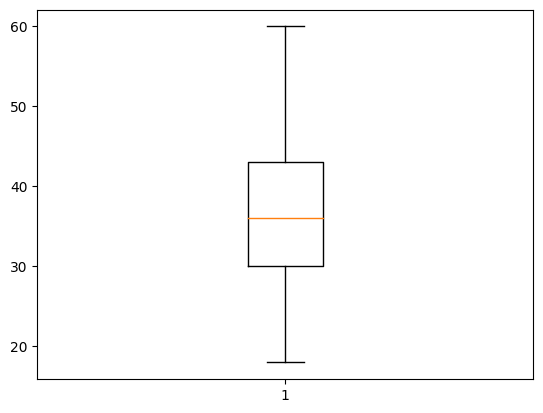

In [ ]:
median = np.median(emp['Age'])
upper_quartile = np.percentile(emp['Age'], 75)
lower_quartile = np.percentile(emp['Age'], 25)

iqr = upper_quartile - lower_quartile
upper_whisker = emp[emp['Age']<=upper_quartile+1.5*iqr].max()
lower_whisker = emp[emp['Age']>=lower_quartile-1.5*iqr].min()

print(median, 'median')
print(upper_quartile, 'upper_quartile')
print(lower_quartile, 'lower_quartile')
print(iqr, 'iqr')
# print(upper_whisker, 'upper_whisker')
# print(lower_whisker, 'lower_whisker')

b = plt.boxplot(emp['Age'])
print([item.get_ydata()[1] for item in b['whiskers']][0], 'lower_whisker')
print([item.get_ydata()[1] for item in b['whiskers']][1], 'upper_whisker')

In [ ]:
# 1.d.

def box_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    mask = (series < Q1 - 1.5 * IQR) | (series > Q3 + 1.5 * IQR)
    series = series[mask]
    return series

In [ ]:
outliers = pd.DataFrame([])

In [ ]:
temp = []

for i in emp['Attrition']:
  dfr_outlier = emp.copy()
  dfr_outlier = dfr_outlier.loc[dfr_outlier['Attrition'] == i, :].reset_index(drop=True)
  dfr_outlier = dfr_outlier[['Attrition', 'Age']].set_index('Attrition').apply(box_outliers)
  dfr_outlier = dfr_outlier.reset_index()
  temp.append(dfr_outlier) 

outliers = pd.concat(temp)

In [ ]:
outliers.reset_index(drop=True)

,Attrition,Age
0,Yes,56
1,Yes,56
2,Yes,56
3,Yes,58
4,Yes,56
...,...,...
7579,Yes,58
7580,Yes,58
7581,Yes,56
7582,Yes,58


<Axes: xlabel='count', ylabel='MaritalStatus'>

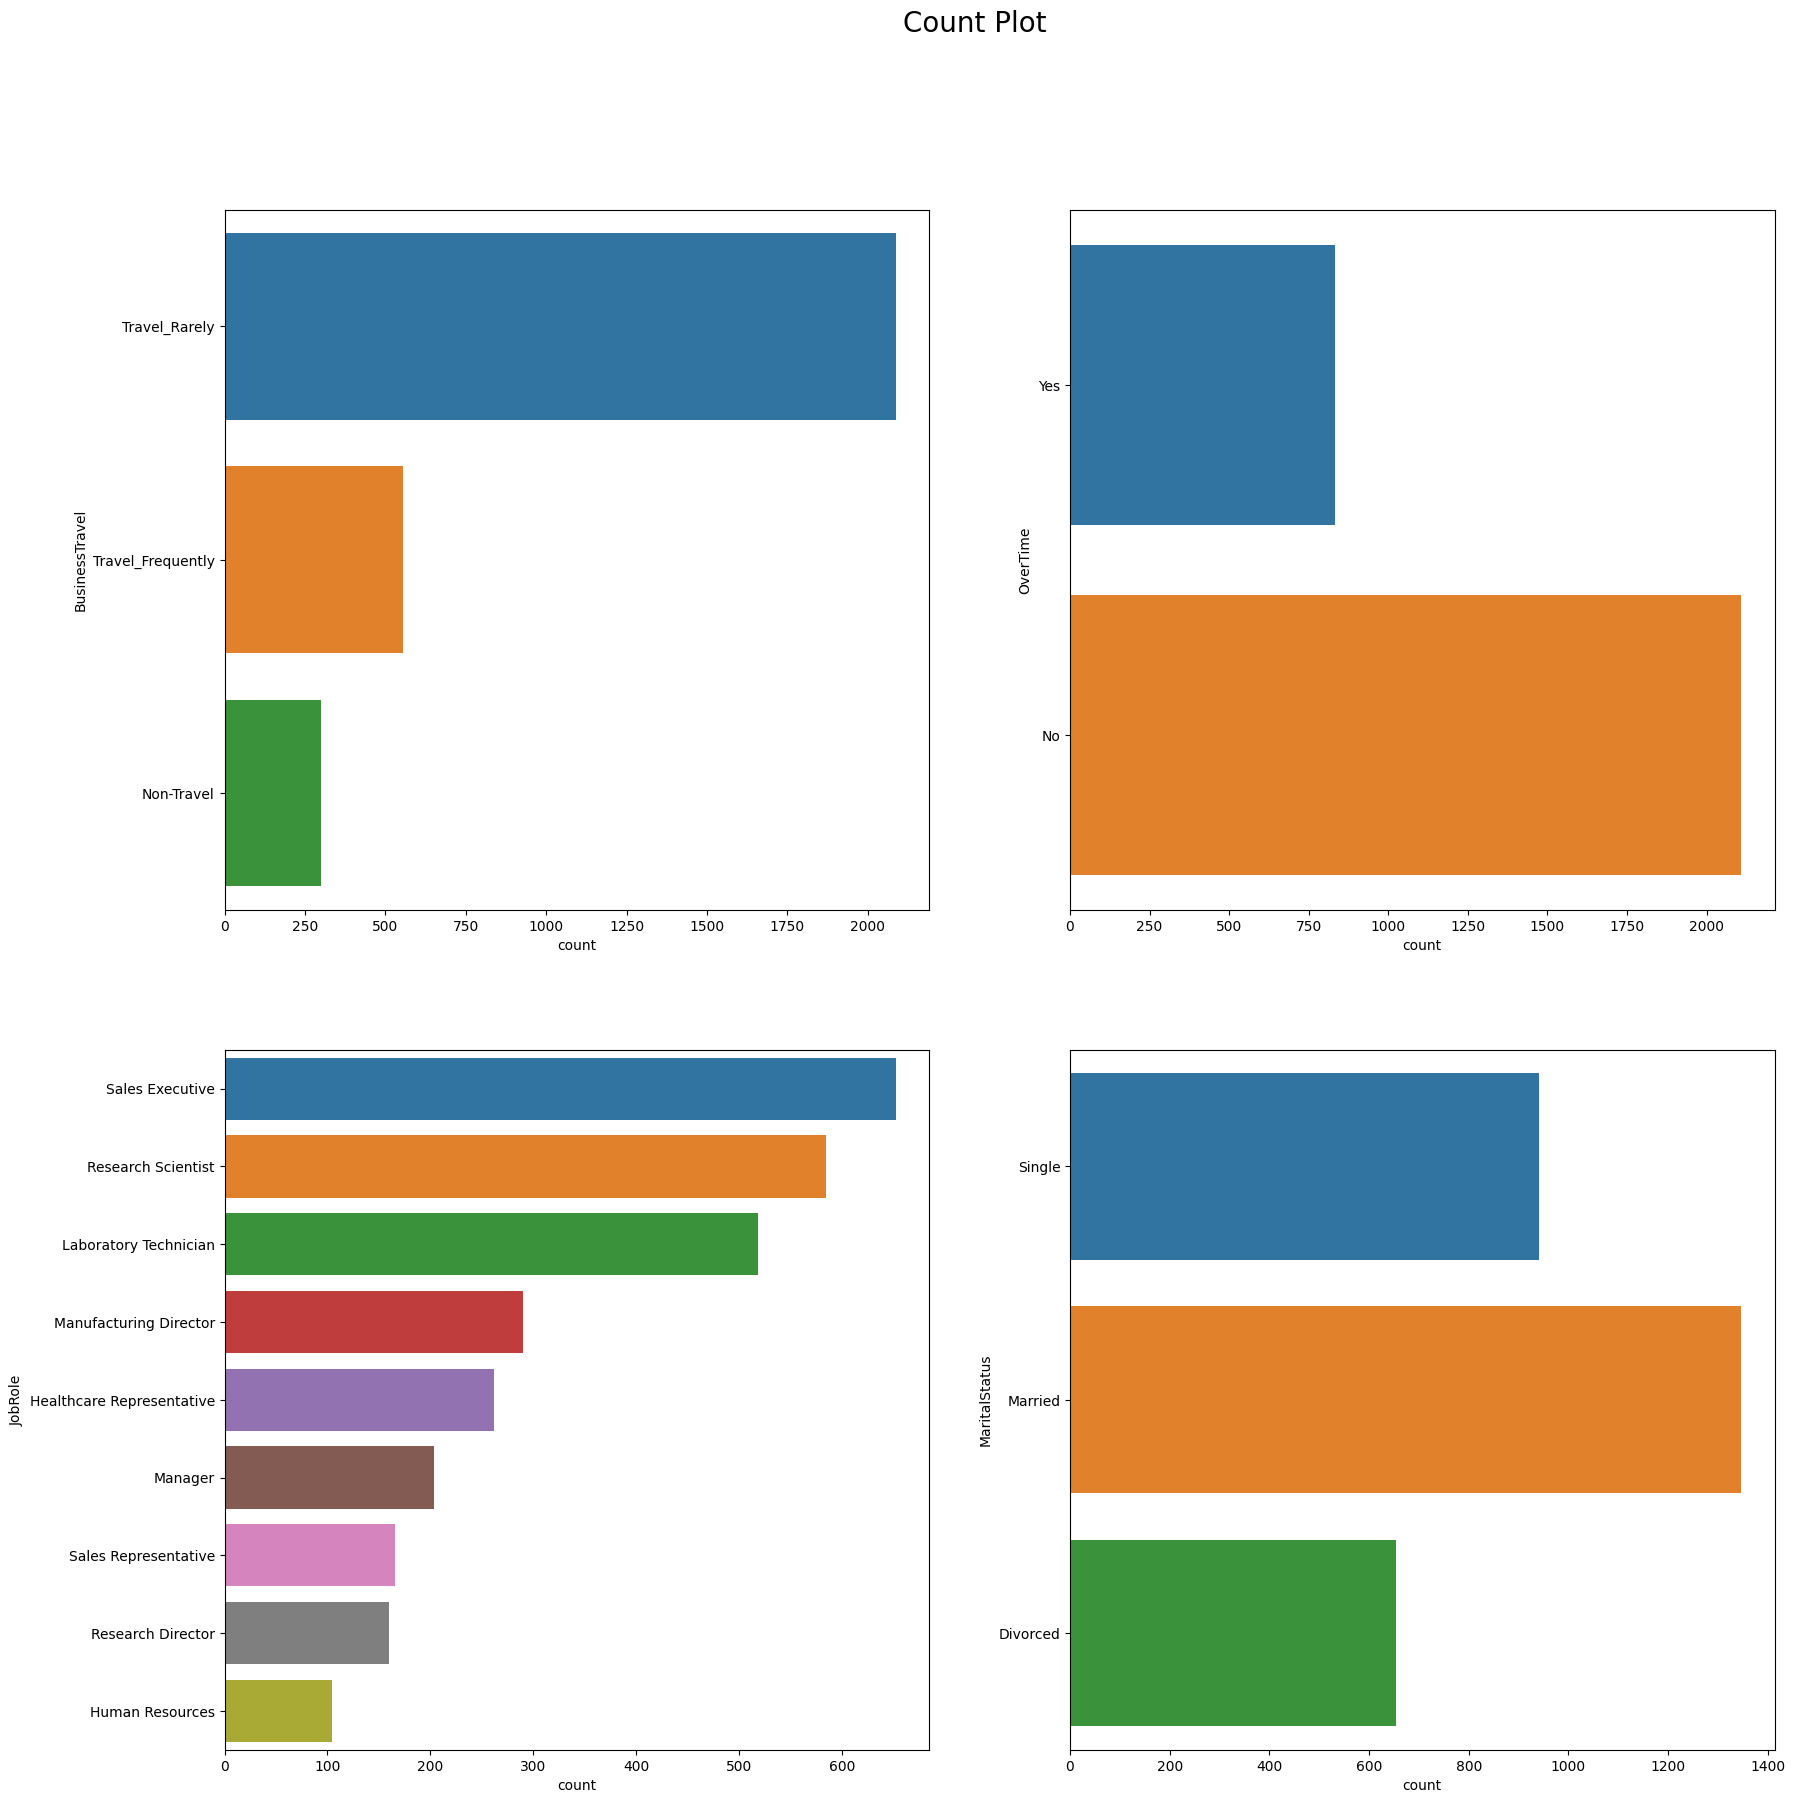

In [ ]:
# 2.a.

fig,ax = plt.subplots(2, 2, figsize=(20,20))

plt.suptitle("Count Plot", fontsize=20)

sns.countplot(y = 'BusinessTravel', data = emp, ax = ax[0, 0])
sns.countplot(y = 'OverTime', data = emp, ax = ax[0, 1])
sns.countplot(y = 'JobRole', data = emp, ax = ax[1, 0])
sns.countplot(y = 'MaritalStatus', data = emp, ax = ax[1, 1])

In [ ]:
# 2.b.

print("All columns Unique category \n")

cat_emp = emp.select_dtypes('object').columns

for cat in cat_emp:
    print(cat ,' => ' , emp[cat].unique())
    print()

print("\nAll columns Unique values frequency: \n")

for i in emp:
    print(i, len(emp[i].unique()), sep=': ')

All columns Unique category 

Attrition  =>  ['Yes' 'No']

BusinessTravel  =>  ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']

Gender  =>  ['Female' 'Male']

JobRole  =>  ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']

MaritalStatus  =>  ['Single' 'Married' 'Divorced']

OverTime  =>  ['Yes' 'No']


All columns Unique values frequency: 

Attrition: 2
Age: 43
BusinessTravel: 3
DistanceFromHome: 29
Education: 5
EnvironmentSatisfaction: 4
Gender: 2
JobInvolvement: 4
JobRole: 9
JobSatisfaction: 4
MaritalStatus: 3
MonthlyIncome: 1349
OverTime: 2
PercentSalaryHike: 15
PerformanceRating: 2
RelationshipSatisfaction: 4
TotalWorkingYears: 40
WorkLifeBalance: 4
YearsAtCompany: 37
YearsInCurrentRole: 19
YearsSinceLastPromotion: 16
YearsWithCurrManager: 18


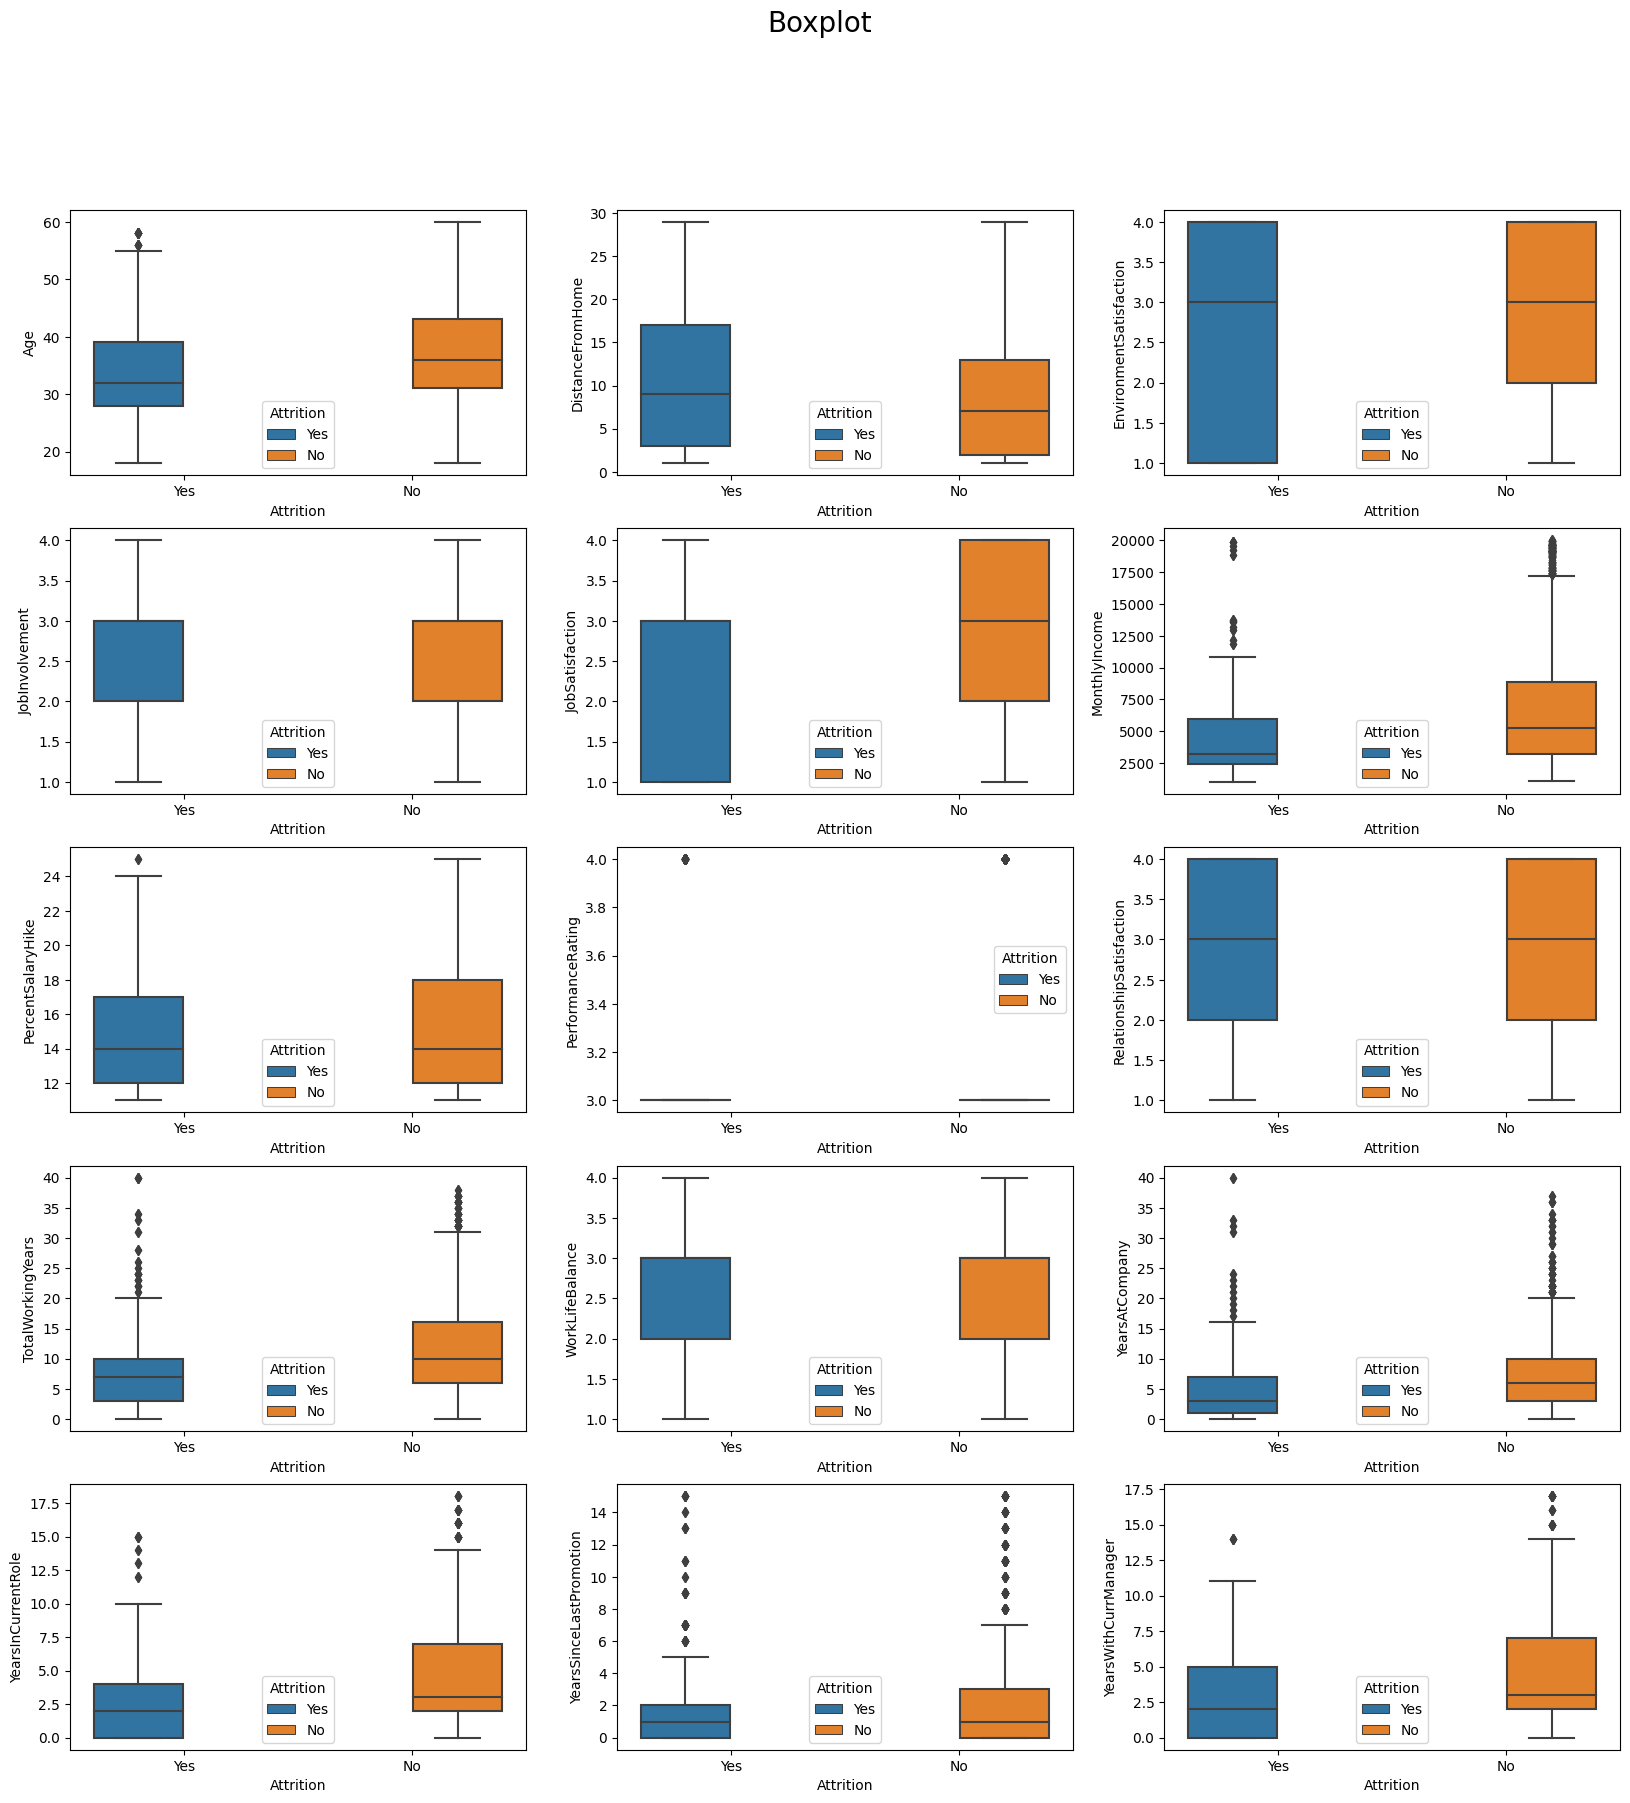

In [ ]:
# 3.a.

fig,ax = plt.subplots(5,3, figsize=(20,20))

plt.suptitle("Boxplot", fontsize=20)

sns.boxplot(x = 'Attrition', y = 'Age', data = emp, hue = 'Attrition', ax = ax[0,0])
sns.boxplot(x = 'Attrition', y = 'DistanceFromHome', data = emp, hue = 'Attrition', ax = ax[0,1])
sns.boxplot(x = 'Attrition', y = 'EnvironmentSatisfaction', data = emp, hue = 'Attrition', ax = ax[0,2])
sns.boxplot(x = 'Attrition', y = 'JobInvolvement', data = emp, hue = 'Attrition', ax = ax[1,0])
sns.boxplot(x = 'Attrition', y = 'JobSatisfaction', data = emp, hue = 'Attrition', ax = ax[1,1])
sns.boxplot(x = 'Attrition', y = 'MonthlyIncome', data = emp, hue = 'Attrition', ax = ax[1,2])
sns.boxplot(x = 'Attrition', y = 'PercentSalaryHike', data = emp, hue = 'Attrition', ax = ax[2,0])
sns.boxplot(x = 'Attrition', y = 'PerformanceRating', data = emp, hue = 'Attrition', ax = ax[2,1])
sns.boxplot(x = 'Attrition', y = 'RelationshipSatisfaction', data = emp, hue = 'Attrition', ax = ax[2,2])
sns.boxplot(x = 'Attrition', y = 'TotalWorkingYears', data = emp, hue = 'Attrition', ax = ax[3,0])
sns.boxplot(x = 'Attrition', y = 'WorkLifeBalance', data = emp, hue = 'Attrition', ax = ax[3,1])
sns.boxplot(x = 'Attrition', y = 'YearsAtCompany', data = emp, hue = 'Attrition', ax = ax[3,2])
sns.boxplot(x = 'Attrition', y = 'YearsInCurrentRole', data = emp, hue = 'Attrition', ax = ax[4,0])
sns.boxplot(x = 'Attrition', y = 'YearsSinceLastPromotion', data = emp, hue = 'Attrition', ax = ax[4,1])
sns.boxplot(x = 'Attrition', y = 'YearsWithCurrManager', data = emp, hue = 'Attrition', ax = ax[4,2])

plt.show()

<Axes: xlabel='count', ylabel='MaritalStatus'>

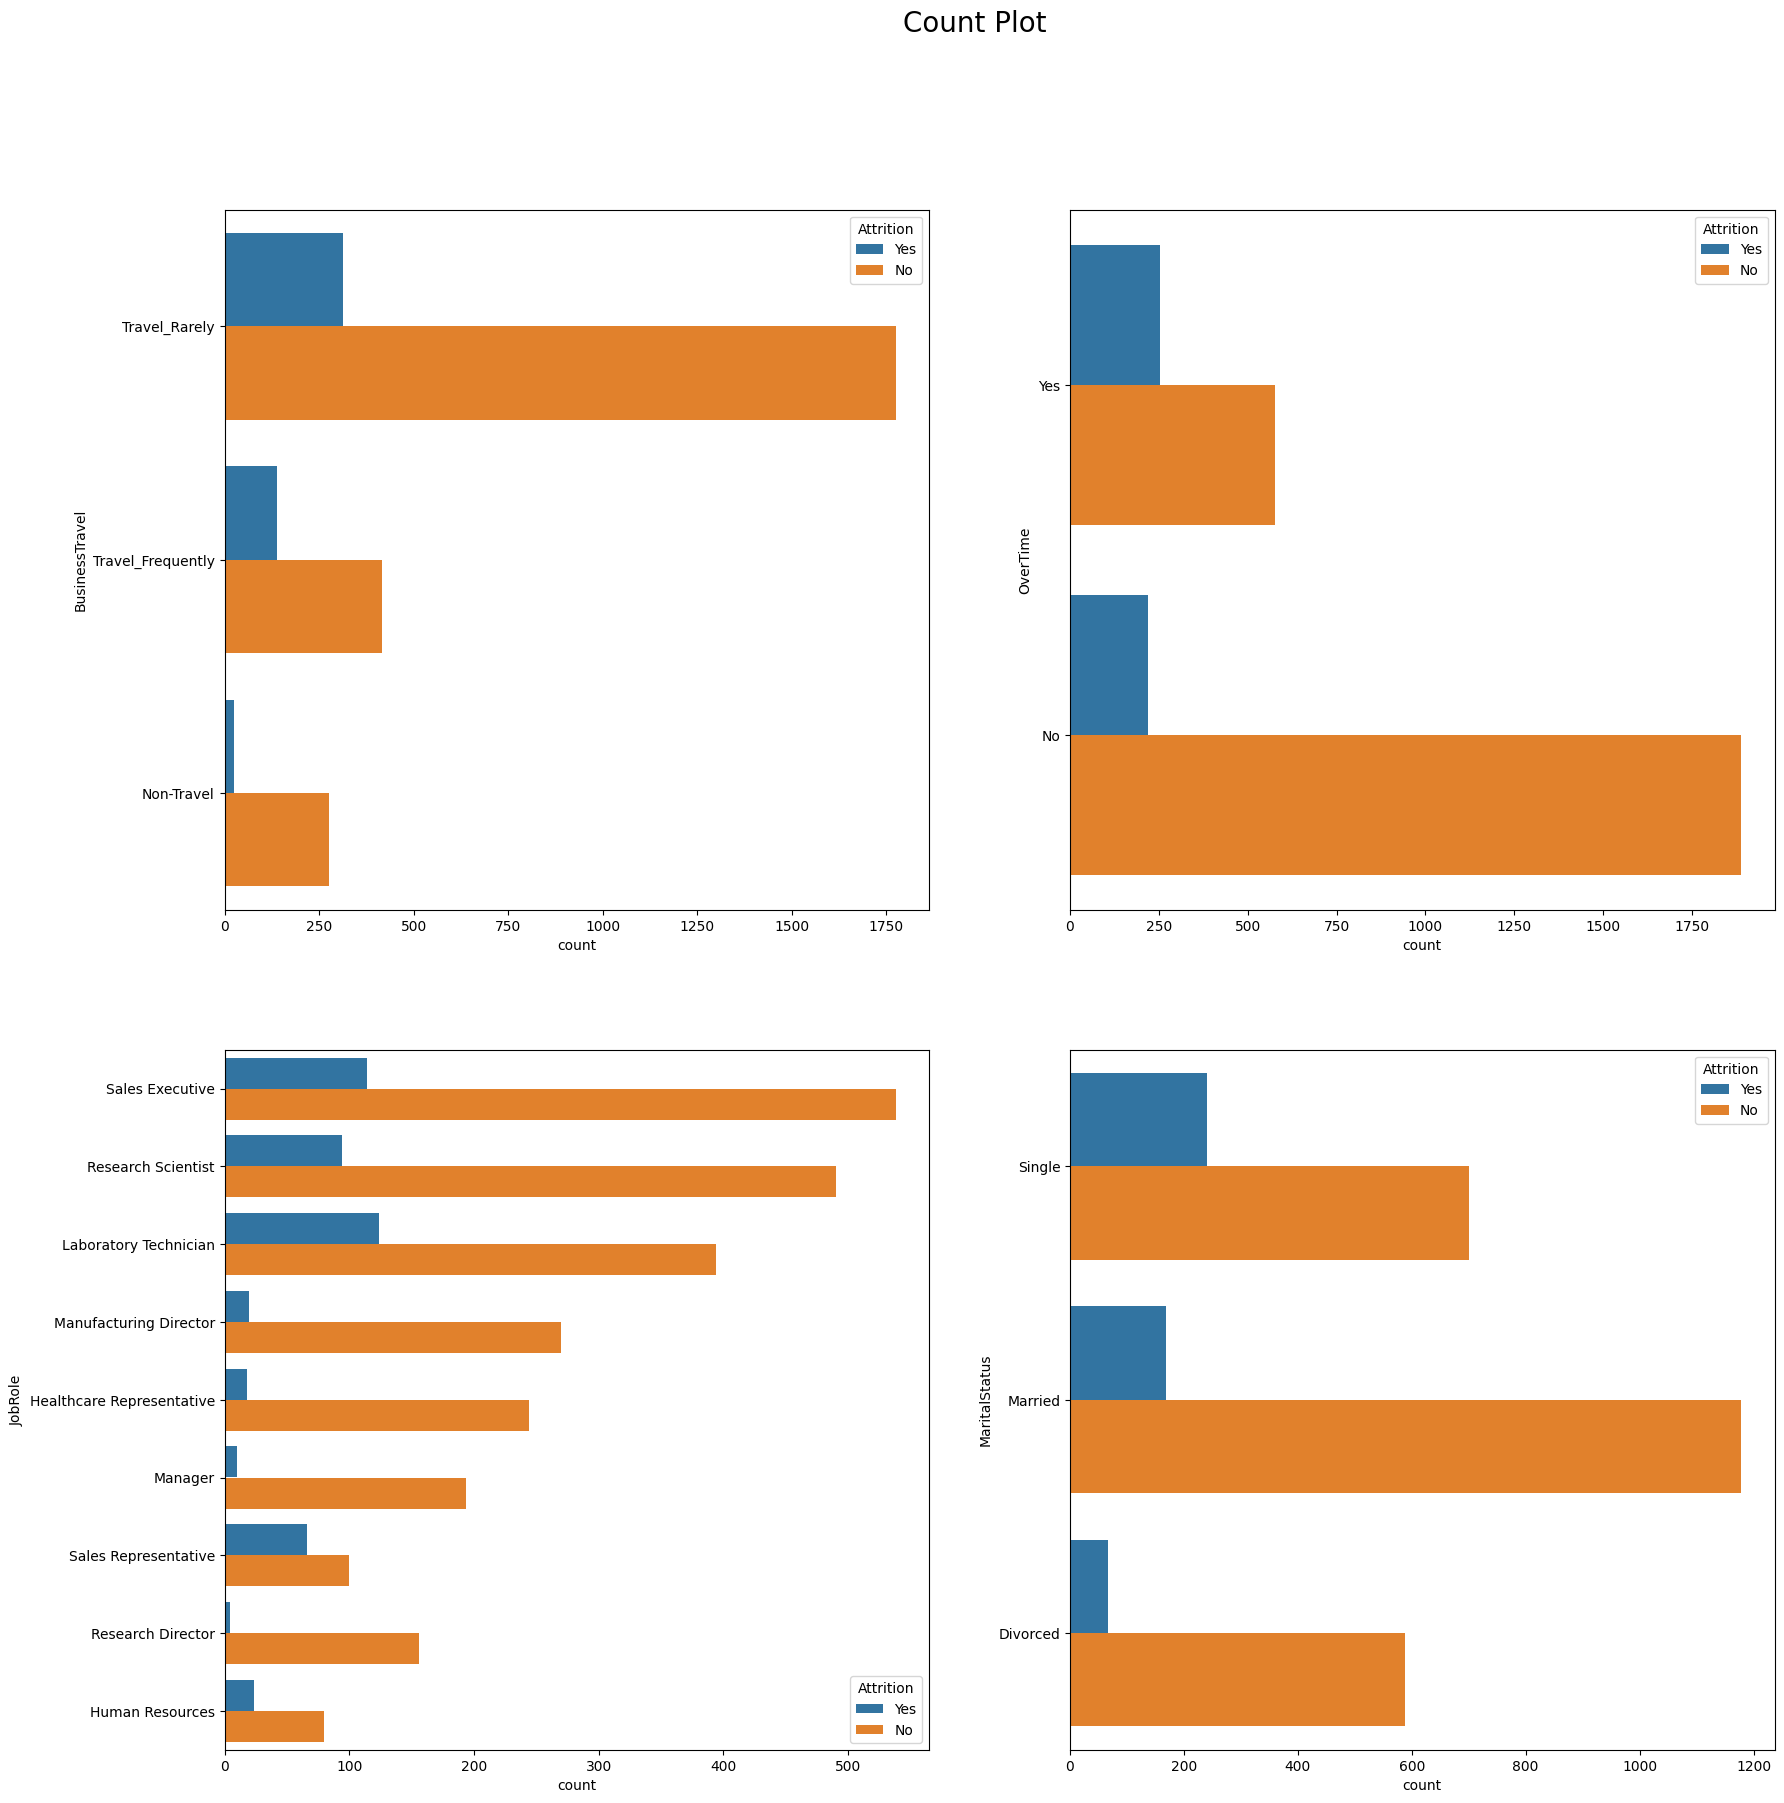

In [ ]:
# 4.a.

fig,ax = plt.subplots(2, 2, figsize=(20,20))

plt.suptitle("Count Plot", fontsize=20)

sns.countplot(y = 'BusinessTravel', data = emp, hue = emp['Attrition'], ax = ax[0, 0])
sns.countplot(y = 'OverTime', data = emp, hue = emp['Attrition'], ax = ax[0, 1])
sns.countplot(y = 'JobRole', data = emp, hue = emp['Attrition'], ax = ax[1, 0])
sns.countplot(y = 'MaritalStatus', data = emp, hue = emp['Attrition'], ax = ax[1, 1])

<Axes: xlabel='MaritalStatus', ylabel='Age'>

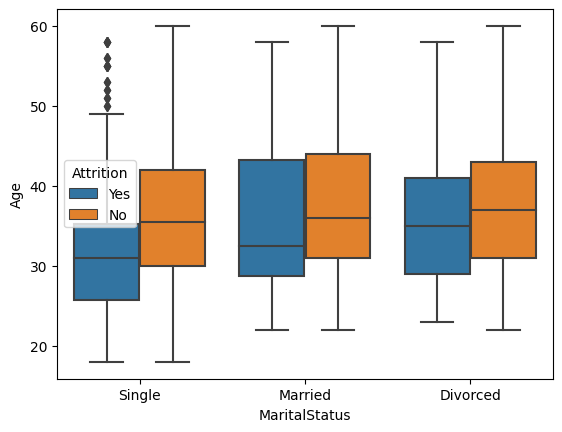

In [ ]:
sns.boxplot(y = 'Age', x = 'MaritalStatus', data = emp, whis=1.5, hue='Attrition',fliersize=5)

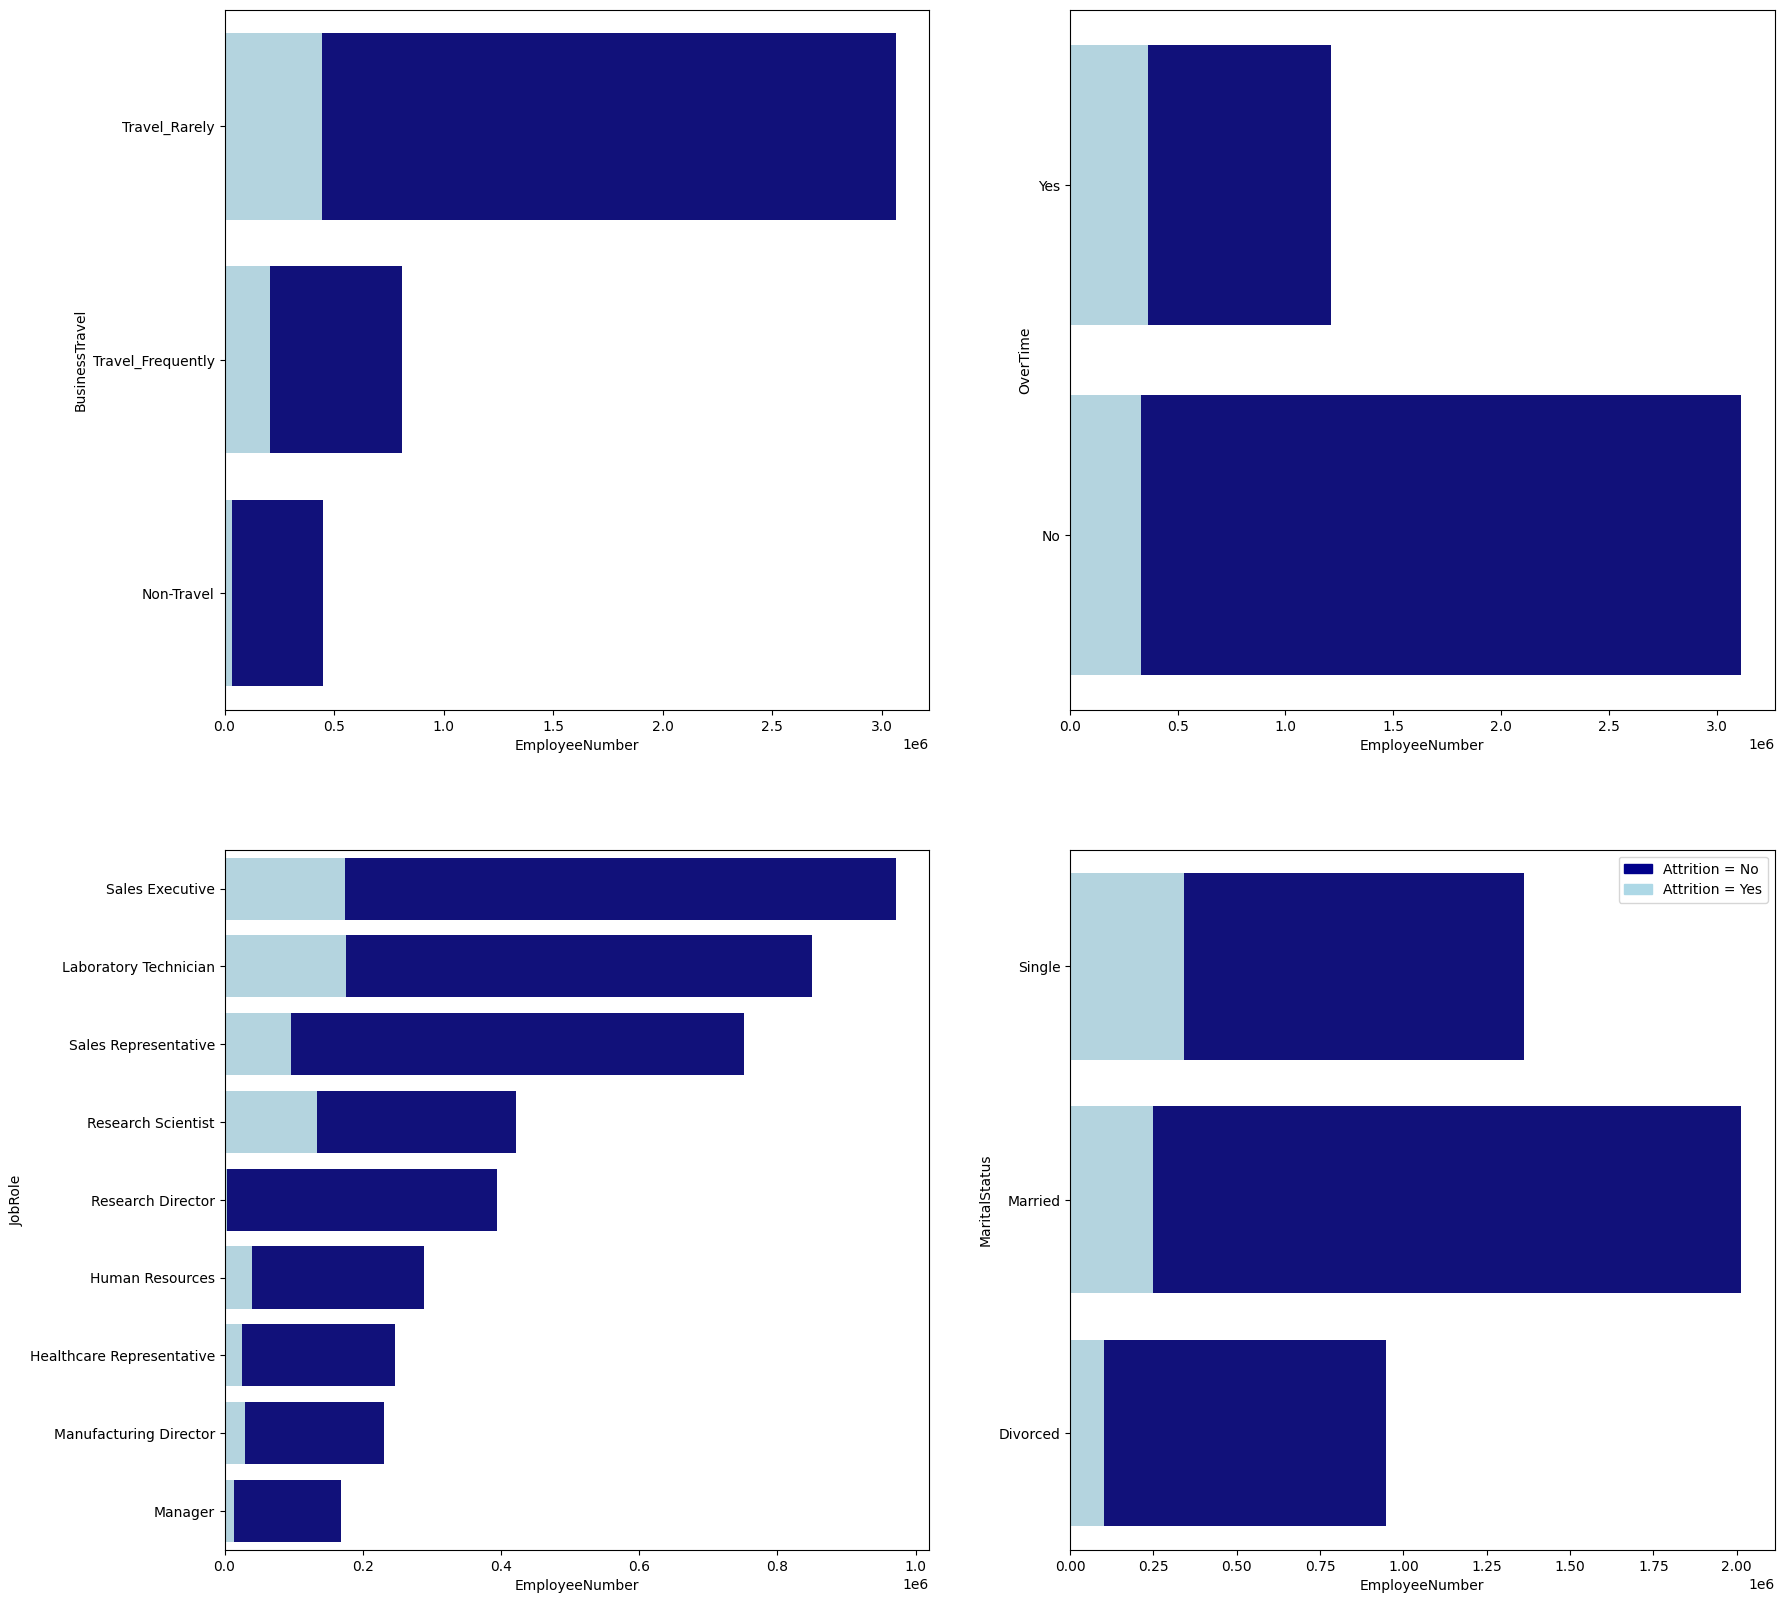

In [ ]:
# 4.b.

fig,ax = plt.subplots(2, 2, figsize=(20,20))

attYes = emp[emp.Attrition=='Yes']

top_bar = mpatches.Patch(color='darkblue', label='Attrition = No')
bottom_bar = mpatches.Patch(color='lightblue', label='Attrition = Yes')

sns.barplot(x = 'EmployeeNumber', y = 'BusinessTravel', data = emp, estimator=sum, errorbar=None,  color='darkblue', ax = ax[0, 0])
sns.barplot(x = 'EmployeeNumber', y = 'BusinessTravel', data = attYes, estimator=sum, errorbar=None,  color='lightblue', ax = ax[0, 0])

sns.barplot(x = 'EmployeeNumber', y = 'OverTime', data = emp, estimator=sum, errorbar=None,  color='darkblue', ax = ax[0, 1])
sns.barplot(x = 'EmployeeNumber', y = 'OverTime', data = attYes, estimator=sum, errorbar=None,  color='lightblue', ax = ax[0, 1])

sns.barplot(x = 'EmployeeNumber', y = 'JobRole', data = emp, estimator=sum, errorbar=None,  color='darkblue', ax = ax[1, 0])
sns.barplot(x = 'EmployeeNumber', y = 'JobRole', data = attYes, estimator=sum, errorbar=None,  color='lightblue', ax = ax[1, 0])

sns.barplot(x = 'EmployeeNumber', y = 'MaritalStatus', data = emp, estimator=sum, errorbar=None,  color='darkblue', ax = ax[1, 1])
sns.barplot(x = 'EmployeeNumber', y = 'MaritalStatus', data = attYes, estimator=sum, errorbar=None,  color='lightblue', ax = ax[1, 1])

plt.legend(handles=[top_bar, bottom_bar])

plt.show()